# Project: Investigate a Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

We are investigating a movie dataset containing information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. From the dataset, we seek to get answers to the following questions:


- What is average runtime of movies?
- Which movie has longest runtime, shortest runtime?

- Which year had the most popular movies/profitable movies, most flop movies?
- Which is the most expensive movie, cheapest movie among profitable movies?
- Which actor had the most hits?
- Which director has the most popular movies?
- Which movie company had the most hits?

 
- We will also look at some trends over the years :
    - cost and profitability over years
    - genres most popular over years


In [1]:
# Importing packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
%matplotlib inline
%config IPCompleter.greedy=True



In [2]:
# Loading the CSV data, printing out first line  
df = pd.read_csv('movies.csv')

df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
# Inspecting size of data and data types
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# Inspecting if null values present in the data set
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<a id='cleaning'></a>
## Data Cleaning the movie data set
<li> Removing unused columns </li>
<li> Removing rows with 0s and blank spaces</li> 
<li> Removing duplicated rows</li>

### 1.  Removing Unused Columns
<ul>
 <li>For our queries some of the columns are redundant and for simplifying the analysis process, it will be helpful to remove them:'id', 'imdb_id', 'popularity', 'budget', 'revenue', 'homepage', 'keywords', 'overview','vote_count' and 'vote_average'</li>
 </ul>
 

In [5]:
#removing unnecessary columns from dataset
df.drop(['id', 'imdb_id', 'popularity', 'tagline', 'budget', 'revenue', 'homepage', 'keywords', 'overview','vote_count','vote_average', 'release_date'], axis=1, inplace=True)


In [6]:
#checking if the columns have been removed
df.head(1)

,original_title,cast,director,runtime,genres,production_companies,release_year,budget_adj,revenue_adj
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09


In [7]:
#Checking if data types of columns (to modify if format changes needed)
df.dtypes

original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [8]:
# convert adjusted budget and revenue from float to int
df['budget_adj'] = df['budget_adj'].astype('int64')
df['revenue_adj'] = df['revenue_adj'].astype('int64')

In [9]:
#Checking the types after format changes
df.dtypes

original_title          object
cast                    object
director                object
runtime                  int64
genres                  object
production_companies    object
release_year             int64
budget_adj               int64
revenue_adj              int64
dtype: object

### 2.  Removing rows with 0s and blank spaces
  <li> Removing the rows with 0s in runtime, budget and revenue.</li>
  <li> Checking and removing rows with blank spaces as values.</li>

In [10]:
#replacing runtime 0 values with NaN
df['runtime'] = df['runtime'].replace(0, np.NaN)

In [11]:
#Dropping 0 value rows from data set for 0 values in budget/revenue columns for further calculations
money_col = ['budget_adj', 'revenue_adj']
df[money_col] = df[money_col].replace(0, np.NaN)
df.dropna(subset = money_col, inplace = True)
df.shape


(3854, 9)

In [12]:
# replace fields that are entirely spaces (or empty) with NaN
df.replace(r'^\s*$', np.nan, regex=True)
df.isnull().any()

original_title          False
cast                     True
director                 True
runtime                 False
genres                  False
production_companies     True
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [13]:
#Dropping all rows with NaN for better accuracy in calculations
df.dropna(inplace=True)

In [14]:
df.shape

(3805, 9)

### 3.  Removing Duplicated Rows 

In [15]:
#checking for duplicate
sum(df.duplicated())

1

In [16]:
#Removing the single duplicate row and verifying
df.drop_duplicates(inplace=True)
df.shape

(3804, 9)

In [17]:
sum(df.duplicated())

0

<a id='wrangling'></a>
## Data Wrangling
<li> Checking data types </li>
<li> Renaming columns to more meaningful names</li>
<li> Inserting new column(s) to support exploratory data analysis</li>

### 1. Checking data types 
<li> converting if needed to other formats</li>

In [18]:
df.dtypes

original_title           object
cast                     object
director                 object
runtime                 float64
genres                   object
production_companies     object
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [19]:
# convert from adjusted budget and revenue from float to int for calculations
df['budget_adj'] = df['budget_adj'].astype('int64')
df['revenue_adj'] = df['revenue_adj'].astype('int64')

In [20]:
df['runtime'] = df['runtime'].astype('int')

In [21]:
df.dtypes

original_title          object
cast                    object
director                object
runtime                  int32
genres                  object
production_companies    object
release_year             int64
budget_adj               int64
revenue_adj              int64
dtype: object

In [22]:
df.shape

(3804, 9)

In [23]:
#checking if any Null values still present
df.isnull().sum()

original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### 2. Renaming columns
<li> We assume that the budget and revenue numbers are in US dollars for our calculations, although currency type is not specified. For calculations, we are renaming 'budget_adj' and 'revenue_adj' as 'budget_USD' and 'revenue_USD'</li>

In [24]:
df.rename(columns = {'budget_adj' : 'budget_USD', 'revenue_adj' : 'revenue_USD'}, inplace = True)
#checking if the renaming has worked well
df.head(1)

,original_title,cast,director,runtime,genres,production_companies,release_year,budget_USD,revenue_USD
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,137999939,1392445892


 ### 3. Inserting columns
<li> We are also going to calculate profit and insert a new column by the name 'profit_USD' </li>

In [25]:
#inserting new column for profit at the 10th position from the left and naming it as 'profit_USD'

df.insert(9, 'profit_USD',df['revenue_USD']-df['budget_USD'])

#previewing the changes in the dataset
df.head(1)

,original_title,cast,director,runtime,genres,production_companies,release_year,budget_USD,revenue_USD,profit_USD
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,137999939,1392445892,1254445953


<a id='eda'></a>
## Exploratory Data Analysis
We analyze the data and try seeking answers to the questions mentioned at the introduction section.
We will also create some data visualizations to search for trends and try to gain conclusions


### Average movie runtime

In [26]:
#Average movie runtime
avg_runtime = df.runtime.mean()

print('The average runtime for movies is {:06.2f} min'.format(avg_runtime))

The average runtime for movies is 109.36 min


### Longest running time for a movie 

In [27]:
#Longest running time for movie

max_time = df.runtime.max()
max_time_id = df['runtime'].idxmax()
movie_name = df.loc[max_time_id].original_title

print('The longest running movie is \"{}\" with a runtime of {:06.2f} min'.format(movie_name, max_time))



The longest running movie is "Carlos" with a runtime of 338.00 min


### Shortest running time for a movie 

In [28]:
#Shortest running time movie

min_time = df.runtime.min()
min_time_id = df['runtime'].idxmin()
movie_name = df.loc[min_time_id].original_title

print('The shortest running movie is \"{}\" with a runtime of {:05.2f} min'.format(movie_name, min_time))
#df[df.runtime == min_time]

The shortest running movie is "Kid's Story" with a runtime of 15.00 min


### Most Expensive movie

In [29]:
max_budget = df.budget_USD.max()

max_budget_id = df['budget_USD'].idxmax()
  
movie_name = df.loc[max_budget_id].original_title
print('The most expensive movie is \"{}\" made at a cost of USD {} million'.format(movie_name, max_budget/1000000))

## df[df.budget_USD == max_budget]


The most expensive movie is "The Warrior's Way" made at a cost of USD 425.0 million


In [30]:
## A wikipedia search reveals the budget for "The Warrior's Way" was closer to $40 million and not $400 million! 
## An extra zero has been wrongly added in the data set for the budget!

In [31]:
#Now we seek to find some more information from profit-making movies and work on data visualization

profit_df = df[df['profit_USD'] > 0]
#select the movies having profit


#re-indexing new data
profit_df.index = range(len(profit_df))
profit_df.shape

(2755, 10)

In [32]:
profit_df.head(1)

,original_title,cast,director,runtime,genres,production_companies,release_year,budget_USD,revenue_USD,profit_USD
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,137999939,1392445892,1254445953


In [33]:
## Separating loss making movies for loss related answers
loss_df = df[df['profit_USD'] < 0]
#select the movies having losses


#re-indexing new data
loss_df.index = range(len(loss_df))
loss_df.shape

(1046, 10)

In [34]:
loss_df.head(1)

,original_title,cast,director,runtime,genres,production_companies,release_year,budget_USD,revenue_USD,profit_USD
0,Mortdecai,Johnny Depp|Gwyneth Paltrow|Ewan McGregor|Paul...,David Koepp,106,Comedy|Adventure,Lionsgate|Mad Chance|OddLot Entertainment|Huay...,2015,55199975,27985062,-27214913


In [35]:
#previewing the changes in the dataset
profit_df.head(2)

,original_title,cast,director,runtime,genres,production_companies,release_year,budget_USD,revenue_USD,profit_USD
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,137999939,1392445892,1254445953
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,137999939,348161292,210161353


### Most Expensive Profitable movie

In [36]:
# Most Expensive Profitable movie


max_budget_profit = profit_df.budget_USD.max()
max_budget_id = profit_df['budget_USD'].idxmax()
  
movie_name = profit_df.loc[max_budget_id].original_title
print('The most expensive profitable movie is \"{}\" made at a cost of USD {:06.2f} million'.format(movie_name, max_budget_profit/1000000))

profit_df.loc[max_budget_id]

The most expensive profitable movie is "Pirates of the Caribbean: On Stranger Tides" made at a cost of USD 368.37 million


original_title                Pirates of the Caribbean: On Stranger Tides
cast                    Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...
director                                                     Rob Marshall
runtime                                                               136
genres                                           Adventure|Action|Fantasy
production_companies    Walt Disney Pictures|Jerry Bruckheimer Films|M...
release_year                                                         2011
budget_USD                                                      368371256
revenue_USD                                                     990417500
profit_USD                                                      622046244
Name: 774, dtype: object

### Cheapest Profitable movie

In [37]:
# Cheapest Profitable movie


min_budget_profit = profit_df.budget_USD.min()
min_budget_id = profit_df['budget_USD'].idxmin()
  
movie_name = profit_df.loc[min_budget_id].original_title
print('The cheapest profitable movie is \"{}\" made at a cost of USD {}'.format(movie_name, min_budget_profit))

profit_df.loc[min_budget_id]

The cheapest profitable movie is "Lost & Found" made at a cost of USD 1


original_title                                               Lost & Found
cast                    David Spade|Sophie Marceau|Ever Carradine|Step...
director                                                     Jeff Pollack
runtime                                                                95
genres                                                     Comedy|Romance
production_companies             Alcon Entertainment|Dinamo Entertainment
release_year                                                         1999
budget_USD                                                              1
revenue_USD                                                           130
profit_USD                                                            129
Name: 572, dtype: object

In [38]:
# For finding information on actors, directors, production companies,
# we need to create a multi-use function

#Creating a function which will take any column with multiple values separated by '|'and return count of the individual values

def extract_type_count(column_name):
    #will take the complete column into a string, each value separated by '|'
    collated_str = profit_df[column_name].str.cat(sep = '|')
    
    # using pandas series to get separate values by splitting
    all_data= pd.Series(collated_str.split('|'))
    
    #count of specific column name in descending order
    count = all_data.value_counts(ascending = False)
    
    return count

### Most successful directors

In [39]:
## Most successful directors
director_count = extract_type_count('director')
#showing top 5 directors
director_count.head()



Steven Spielberg    27
Clint Eastwood      21
Tim Burton          16
Ridley Scott        16
Robert Zemeckis     15
dtype: int64

### Most successful actors

In [40]:
## Most successful actors
actor_count = extract_type_count('cast')
#showing top 5 actors
actor_count.head()

Robert De Niro       38
Bruce Willis         33
Tom Hanks            33
Tom Cruise           31
Samuel L. Jackson    30
dtype: int64

### Most successful movie companies

In [41]:
## Most successful movie companies
production_count = extract_type_count('production_companies')
#showing top 5 production companies
production_count.head()

Universal Pictures                        269
Warner Bros.                              250
Paramount Pictures                        221
Twentieth Century Fox Film Corporation    173
Columbia Pictures                         150
dtype: int64

### Most popular movie genres

In [42]:
# Most popular movie genres
# Checking with profitable movies
genre_count = extract_type_count('genres')
#showing top 5 production companies
genre_count.head()


Drama        1160
Comedy        998
Thriller      836
Action        785
Adventure     573
dtype: int64

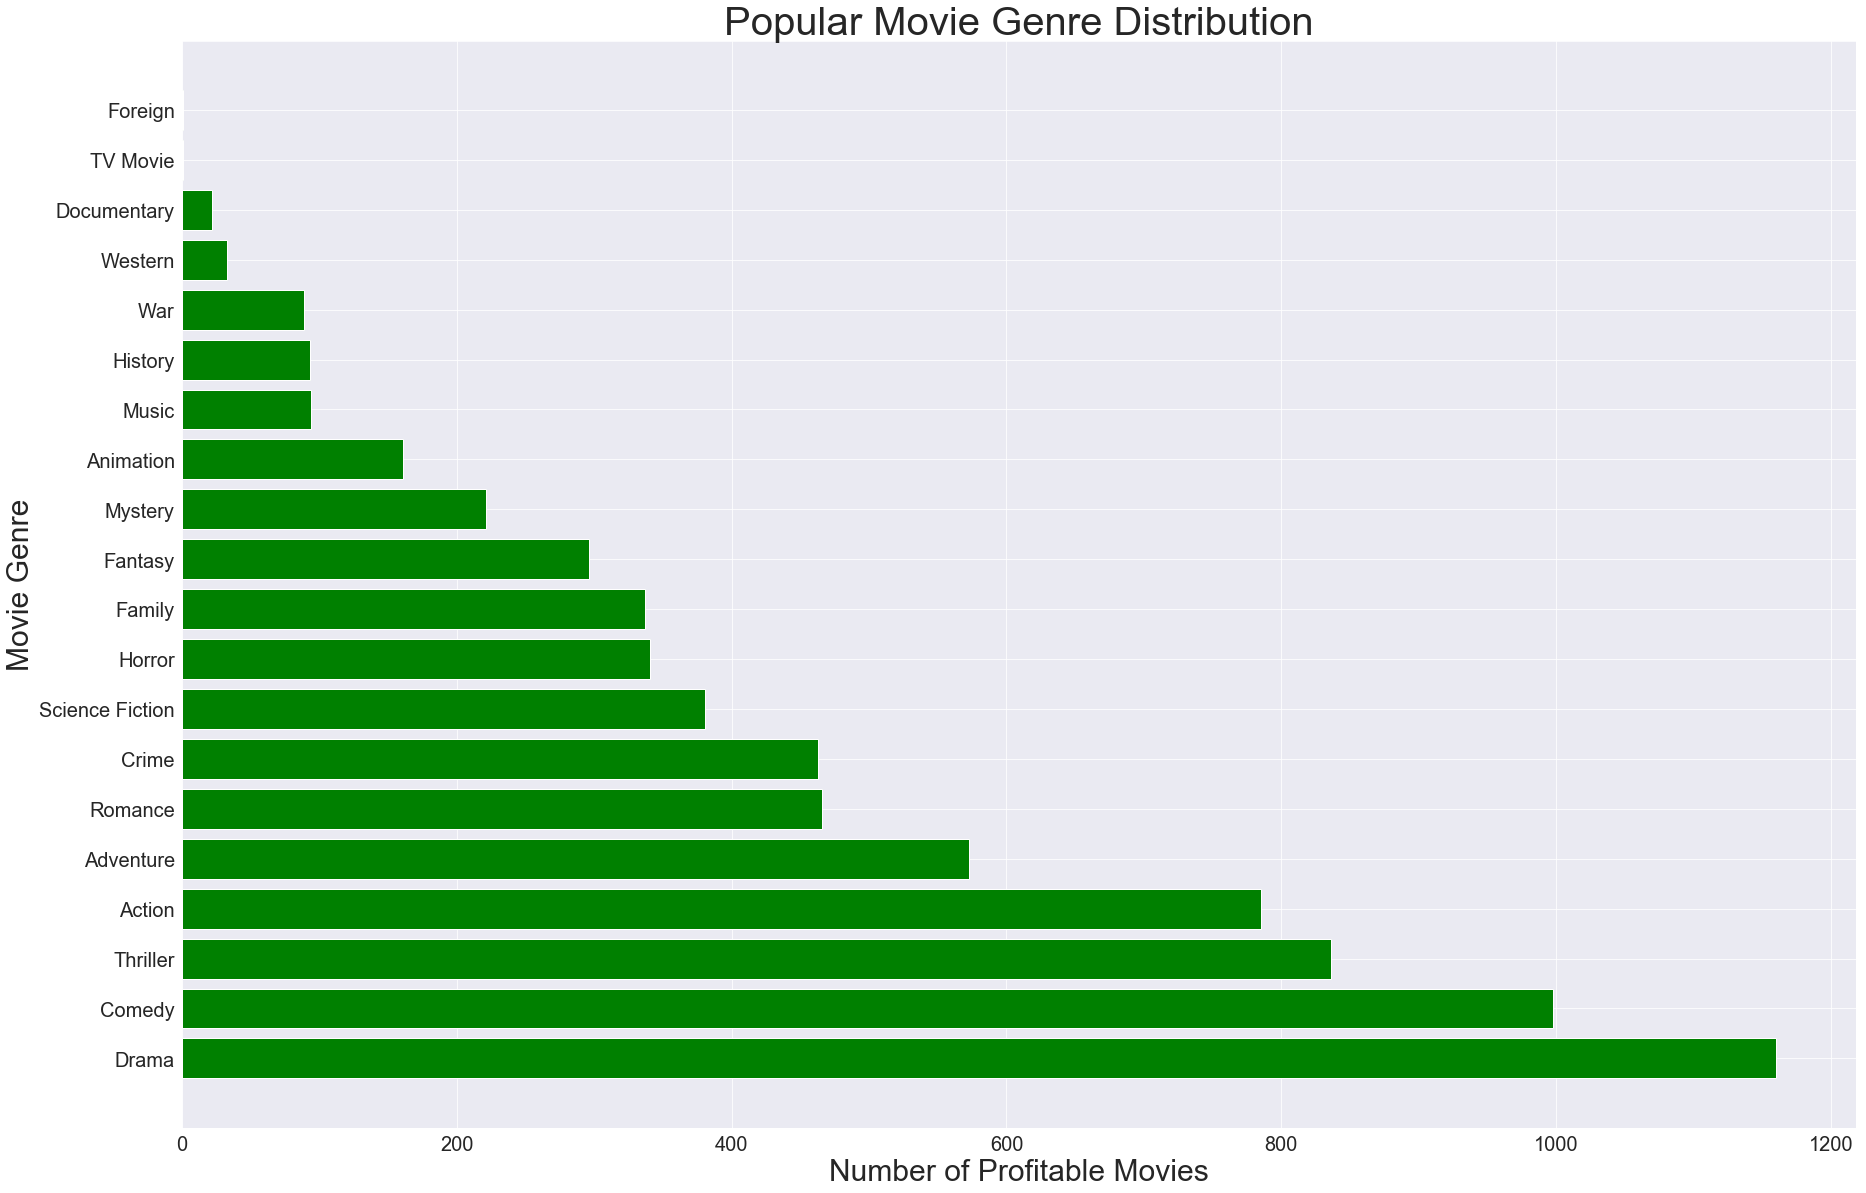

In [43]:
#genre_count_distribution
plt.subplots(figsize=(30,20))
plt.barh(genre_count.index, genre_count, color='green')

plt.title('Popular Movie Genre Distribution', fontsize=40)
plt.ylabel('Movie Genre', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Number of Profitable Movies', fontsize=30);

#### Learnings on Runtime
> From the horizontal bar graph, we can see that by far the most profitable movie genres are drama, comedy, thriller, action and adventure movies, in descending order. 

### Year with Most Profits

In [44]:
## Year with Most Profitable Movies
#summing up total year-wise profits for profitable movies
profits_year_list = profit_df.groupby('release_year')['profit_USD'].sum()
#the year with highest value is the most profitable year for movie releases
max_year= profits_year_list.idxmax()

print("{} was the year with the most profitable movies".format(max_year))

2015 was the year with the most profitable movies


### Year with Most Losses

In [45]:
## Year with Most Movies with Losses
#summing up total year-wise losses for movies
loss_year_list = loss_df.groupby('release_year')['profit_USD'].sum()

#the year with highest value is the most losses for movie releases
max_loss_year= loss_year_list.idxmin()

print("{} was the year with the most losses".format(max_loss_year))

1999 was the year with the most losses


### RunTime Trends

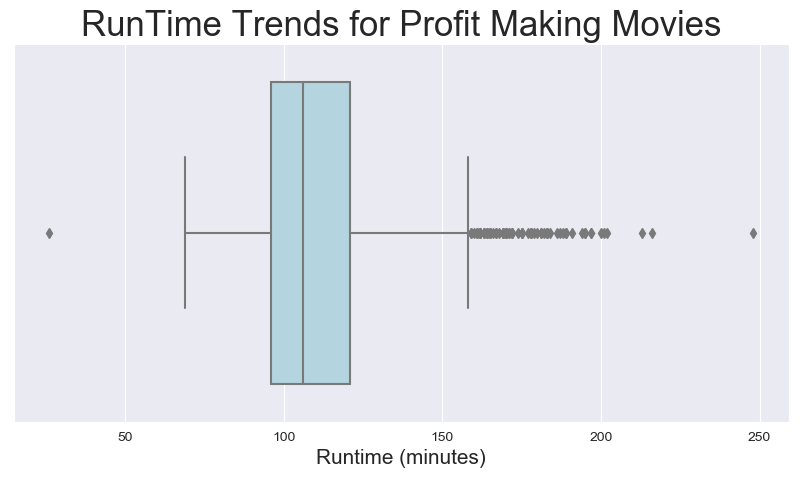

In [46]:
# Runtime trends for the profit making movies

plt.figure(figsize=(10,5), dpi = 100)

#creating a box plot in sns
ax = sns.boxplot(profit_df['runtime'], color='LightBlue')
ax.axes.set_title('RunTime Trends for Profit Making Movies',fontsize=25)
ax.set_xlabel('Runtime (minutes)',fontsize=15)

#diplaying the plot
plt.show()




In [47]:
profit_df['runtime'].describe()

count    2755.000000
mean      110.231942
std        20.050742
min        26.000000
25%        96.000000
50%       106.000000
75%       121.000000
max       248.000000
Name: runtime, dtype: float64

#### Learnings on Runtime
> From the box plot we see that 75% successful movies have runtime over 96 min.  50% movies have a runtime between less than 106 min (median value). Half the movies are between 96 min and 121 min long.


### Profitability Trends

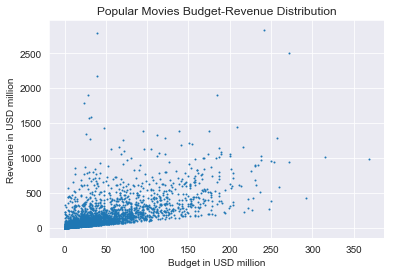

In [48]:
#plt.subplots(figsize=(30,20))
plt.plot( profit_df['budget_USD']/1000000, profit_df['revenue_USD']/1000000, linestyle='', marker='o', markersize=1)
plt.title('Popular Movies Budget-Revenue Distribution')
plt.xlabel('Budget in USD million')
plt.ylabel('Revenue in USD million')
plt.show()




In [49]:
profit_df.describe()

,runtime,release_year,budget_USD,revenue_USD,profit_USD
count,2755.000000,2755.000000,2.755000e+03,2.755000e+03,2.755000e+03
mean,110.231942,2000.548457,4.796556e+07,1.844056e+08,1.364400e+08
std,20.050742,12.025667,4.767108e+07,2.393023e+08,2.140314e+08
min,26.000000,1960.000000,1.000000e+00,1.000000e+01,1.000000e+00
25%,96.000000,1994.000000,1.454097e+07,4.527985e+07,2.080308e+07
50%,106.000000,2004.000000,3.219998e+07,1.020056e+08,6.211780e+07
75%,121.000000,2010.000000,6.583113e+07,2.233288e+08,1.562034e+08
max,248.000000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09


#### Learnings on Profitability
>  <li> From the above we see that the median budget for profitable movies is close to USD 50 million ($ 47.67 mm).</li>
> <li>75% of movies are made at a maximum budget of 65.8 million USD.</li> 
> <li>Half the profitable movies earn more than  USD 239 million.</li>


<a id='conclusions'></a>
## Conclusions

Based on the analysis done, it may be estimated that a budget of $50 million USD has a high chance of success, if it involves the top producing companies, directors and actors.

